In [1]:
#pip install imblearn

In [590]:
import numpy as np
import numpy
import pandas as pd
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import plot_importance
import seaborn as sns
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification

In [783]:
mesames = read_csv('mes0102030405060708091011120102030405060708091011_ano2021acc.csv', delimiter=",", low_memory=False, keep_default_na=False)

In [780]:
mesames = mesames.drop(mesames.columns[0], axis=1)

In [781]:
mesames = mesames.drop(mesames.columns[0], axis=1)

In [782]:
mesames = mesames.drop(mesames.columns[0], axis=1)

In [766]:
mesames = mesames.drop(mesames.columns[0], axis=1)

In [767]:
#
mesames = mesames.drop(mesames.columns[0], axis=1)

In [768]:
#
mesames = mesames.drop(columns=['VACINA_COV'])

In [769]:
#mesames

In [770]:
dataset = mesames.values
# split data into X and y
n, m = mesames.shape 
X = dataset[:,0:m-1]
Y = dataset[:,m-1]

              precision    recall  f1-score   support

           0       0.55      0.13      0.21     63129
           1       0.69      0.95      0.80    128116

    accuracy                           0.68    191245
   macro avg       0.62      0.54      0.50    191245
weighted avg       0.64      0.68      0.60    191245



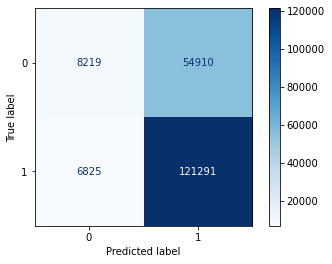

In [771]:
seed = 7
test_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, 
shuffle=True, stratify=Y)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [772]:
#seed = 7
#test_size = 0.33

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, 
#shuffle=True, stratify=Y)

#oversampled = SMOTE(sampling_strategy=0.7, random_state=0, k_neighbors=4)

#X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

# fit model no training data
#model = XGBClassifier()
#model.fit(X_train_smote, y_train_smote)

# make predictions for test data
#start = time.time()
#y_pred = model.predict(X_test)
#print(time.time() - start)
#predictions = [round(value) for value in y_pred]

# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)

#cross validation
#kfold = KFold(n_splits=10, random_state= None)
#results = cross_val_score(model, X_train, y_train, cv=kfold)

#print("Accuracy: %.2f%%" % (accuracy * 100.0))
#plot_importance(model)
#plt.show()

#print(classification_report(y_test, y_pred))
#plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [773]:
import shap

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value
#print(shap_values)
#print(expected_value)


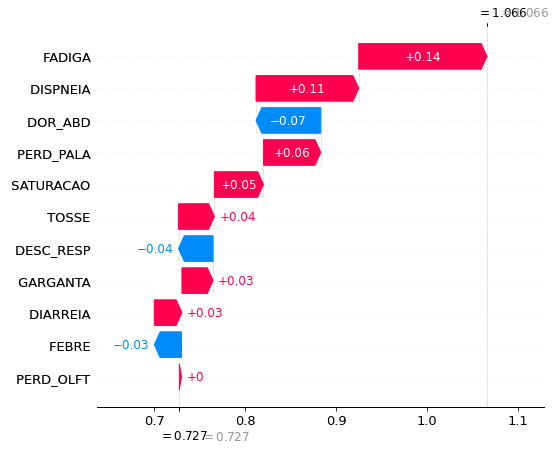

In [774]:
# O gráfico é calculado por sample, ou seja, cada linha possui seu shap value
# O  valor inferior no gráfico é base value ou Expected value E[f(x)] e f(x) a predição do modelo 
# E[f(x)] é o valor que seria previsto se não conhecêssemos nenhuma feature para a saída atual
# Em outras palavras, é a previsão média, ou média(y)
# Assim, E[f(x)] número médio previsto casos de covid entre todas as observações
# O valor final f(x) é o número previsto de casos para esta observação.

i= 1000
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[m-i], features = X[m-i,:], feature_names=['DESC_RESP','DIARREIA',
                  'DISPNEIA','DOR_ABD','FADIGA','FEBRE','GARGANTA',
                  'PERD_OLFT','PERD_PALA','SATURACAO','TOSSE','VOMITO'], max_display = 30)

In [775]:
mesames = read_csv('mes0102030405060708091011120102030405060708091011_ano2021acc.csv', delimiter=",", low_memory=False, keep_default_na=False)

In [776]:
dfmes = mesames[['FADIGA','DISPNEIA','DOR_ABD','PERD_PALA','SATURACAO','CLASSI_FIN']]

In [777]:
#dfmes

In [778]:
dfmes.to_csv("df_mes0102030405060708091011120102030405060708091011_ano2021acc.csv")